In [1]:
%matplotlib inline

# keras序贯模型使用范例
* 二分类实验
* 多分类实验

#### 模型编译
    compile(self, optimizer, loss, metrics=[], loss_weights=None, sample_weight_mode=None)
    
    本函数编译模型以供训练，参数有:
*   optimizer：优化器
        为预定义优化器名或优化器对象，参考优化器
*   loss：目标函数
        为预定义损失函数名或一个目标函数，参考目标函数
*   metrics：列表
        包含评估模型在训练和测试时的性能的指标，典型用法是metrics=['accuracy']如果要在多输出模型中为不同的输出指定不同的指标，可像该参数传递一个字典，例如metrics={'ouput_a': 'accuracy'}
*   sample_weight_mode：
        如果你需要按时间步为样本赋权（2D权矩阵），将该值设为“temporal”。默认为“None”，代表按样本赋权（1D权）。如果模型有多个输出，可以向该参数传入指定sample_weight_mode的字典或列表。在下面fit函数的解释中有相关的参考内容。
*   kwargs：
        使用TensorFlow作为后端请忽略该参数，若使用Theano作为后端，kwargs的值将会传递给 K.function

    【Tips】如果你只是载入模型并利用其predict，可以不用进行compile。在Keras中，compile主要完成损失函数和优化器的一些配置，是为训练服务的。predict会在内部进行符号函数的编译工作（通过调用_make_predict_function生成函数）【@白菜，@我是小将】    
    
#### 模型训练
    fit(self, x, y, batch_size=32, nb_epoch=10, verbose=1, callbacks=[], validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None)
    
    本函数用以训练模型，参数有：

*    x：输入数据。如果模型只有一个输入，那么x的类型是numpy array，如果模型有多个输入，那么x的类型应当为list，list的元素是对应于各个输入的numpy array。如果模型的每个输入都有名字，则可以传入一个字典，将输入名与其输入数据对应起来。

*    y：标签，numpy array。如果模型有多个输出，可以传入一个numpy array的list。如果模型的输出拥有名字，则可以传入一个字典，将输出名与其标签对应起来。

*    batch_size：整数，指定进行梯度下降时每个batch包含的样本数。训练时一个batch的样本会被计算一次梯度下降，使目标函数优化一步。

*    nb_epoch：整数，训练的轮数，训练数据将会被遍历nb_epoch次。Keras中nb开头的变量均为"number of"的意思

*    verbose：日志显示，0为不在标准输出流输出日志信息，1为输出进度条记录，2为每个epoch输出一行记录

*    callbacks：list，其中的元素是keras.callbacks.Callback的对象。这个list中的回调函数将会在训练过程中的适当时机被调用，参考回调函数

*    validation_split：0~1之间的浮点数，用来指定训练集的一定比例数据作为验证集。验证集将不参与训练，并在每个epoch结束后测试的模型的指标，如损失函数、精确度等。

*    validation_data：形式为（X，y）或（X，y，sample_weights）的tuple，是指定的验证集。此参数将覆盖validation_spilt。

*    shuffle：布尔值，表示是否在训练过程中每个epoch前随机打乱输入样本的顺序。

*    class_weight：字典，将不同的类别映射为不同的权值，该参数用来在训练过程中调整损失函数（只能用于训练）。该参数在处理非平衡的训练数据（某些类的训练样本数很少）时，可以使得损失函数对样本数不足的数据更加关注。

*    sample_weight：权值的numpy array，用于在训练时调整损失函数（仅用于训练）。可以传递一个1D的与样本等长的向量用于对样本进行1对1的加权，或者在面对时序数据时，传递一个的形式为（samples，sequence_length）的矩阵来为每个时间步上的样本赋不同的权。这种情况下请确定在编译模型时添加了sample_weight_mode='temporal'。

    fit函数返回一个History的对象，其History.history属性记录了损失函数和其他指标的数值随epoch变化的情况，如果有验证集的话，也包含了验证集的这些指标变化情况    
    
#### 模型估计
    evaluate(self, x, y, batch_size=32, verbose=1, sample_weight=None)
    
    本函数按batch计算在某些输入数据上模型的误差，其参数有：

*    x：输入数据，与fit一样，是numpy array或numpy array的list

*    y：标签，numpy array

*    batch_size：整数，含义同fit的同名参数

*    verbose：含义同fit的同名参数，但只能取0或1

*    sample_weight：numpy array，含义同fit的同名参数

    本函数返回一个测试误差的标量值（如果模型没有其他评价指标），或一个标量的list（如果模型还有其他的评价指标）。model.metrics_names将给出list中各个值的含义。

    如果没有特殊说明，以下函数的参数均保持与fit的同名参数相同的含义

    如果没有特殊说明，以下函数的verbose参数（如果有）均只能取0或1    
    
#### 模型测试
    predict(self, x, batch_size=32, verbose=0)
    
    本函数按batch获得输入数据对应的输出，其参数有：

    函数的返回值是预测值的numpy array    

In [2]:
import os
import numpy as np
import tensorflow
import keras
from keras import models,layers,optimizers

Using TensorFlow backend.


## 二分类实验
    训练数据说明
    x,y数据值范围为[0,1]
    x+y<1  => label=0
    x+y>=1 => label=1

##### 二分类实验：构造数据

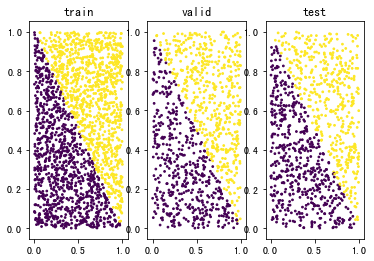

In [3]:
num_train=2000
num_valid=1000
num_test =1000
#========构造数据=======
#构造训练数据
x_train=np.random.rand(num_train,2)
y_train=np.sum(x_train,axis=1)
y_train[y_train<1]=0
y_train[y_train>=1]=1
#构造校验数据
x_valid=np.random.rand(num_valid,2)
y_valid=np.sum(x_valid,axis=1)
y_valid[y_valid<1]=0
y_valid[y_valid>=1]=1
#构造测试数据
x_test =np.random.rand(num_test,2)
y_test=np.sum(x_test,axis=1)
y_test[y_test<1]=0
y_test[y_test>=1]=1

#======绘制散点图======
import matplotlib.pyplot as plt
plt.subplot(1,3,1)
plt.scatter(x_train[:,0], x_train[:,1], s=3, c=y_train)
plt.title('train')
plt.subplot(1,3,2)
plt.scatter(x_valid[:,0], x_valid[:,1], s=3, c=y_valid)
plt.title('valid')
plt.subplot(1,3,3)
plt.scatter(x_test[:,0], x_test[:,1], s=3, c=y_test)
plt.title('test')
plt.show()

##### 二分类实验：模型训练/测试

In [4]:
#=======构建模型=======
model=models.Sequential()
model.add(layers.Dense(40,input_shape=(2,), activation='relu',name='dense_1'))
model.add(layers.Dense(20, activation='relu',name='dense_2'))
model.add(layers.Dense(10, activation='relu',name='dense_3'))
model.add(layers.Dense(4, activation='relu',name='dense_4'))
model.add(layers.Dense(1, activation='sigmoid',name='dense_0'))
#打印模型
model.summary()
#模型编译
model.compile(loss='binary_crossentropy',
          optimizer=optimizers.RMSprop(lr=1e-4),
          metrics=['acc'])
#=======模型训练========
model.fit(x_train,y_train,epochs=3,validation_split=0.2)
#=======模型估计========
y_eval=model.evaluate(x_valid, y_valid)
print('模型估计:',y_eval)

#=======模型预测========
y_pred=model.predict(x_test)
y_pred[y_pred<0.5]=0
y_pred[y_pred>=.05]=1
#=======正确率统计======
y_pred=np.reshape(y_pred,(-1))
acc=1.0-np.count_nonzero(y_pred-y_test)*1.0/len(y_pred)
print('acc:',acc)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 40)                120       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                820       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 44        
_________________________________________________________________
dense_0 (Dense)              (None, 1)                 5         
Total params: 1,199
Trainable params: 1,199
Non-trainable params: 0
_________________________________________________________________
Train on 1600 samples, validate on 400 samples
Epoch 1/3
1600/1600 [==============================] - 1s 605us/step - loss: 0.6910 - acc: 0.

## 多分类实验
    训练数据说明
    x,y数据值范围为[0,1]
    x+y<=0.3             => label=0
    x+y>0.3 and x+y<=0.6 => label=1
    x+y>0.6              => label=2

##### 多分类实验:构造数据`

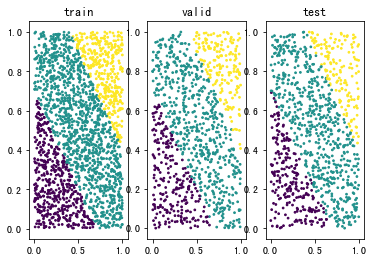

In [5]:
import numpy as np

num_train=2000
num_valid=1000
num_test =1000
#========构造数据=======
#构造训练数据
x_train=np.random.rand(num_train,2)
y_train=np.sum(x_train,axis=1)
y_train[np.where((y_train<=0.7))[0]]=0
y_train[np.where((y_train>0.7)&(y_train<=1.4))[0]]=1
y_train[np.where((y_train>1.4))[0]]=2
#构造校验数据
x_valid=np.random.rand(num_valid,2)
y_valid=np.sum(x_valid,axis=1)
y_valid[np.where((y_valid<=0.7))[0]]=0
y_valid[np.where((y_valid>0.7)&(y_valid<=1.4))[0]]=1
y_valid[np.where((y_valid>1.4))[0]]=2
#构造测试数据
x_test =np.random.rand(num_test,2)
y_test=np.sum(x_test,axis=1)
y_test[np.where((y_test<=0.7))[0]]=0
y_test[np.where((y_test>0.7)&(y_test<=1.4))[0]]=1
y_test[np.where((y_test>1.4))[0]]=2

#======绘制散点图======
import matplotlib.pyplot as plt
plt.subplot(1,3,1)
plt.scatter(x_train[:,0], x_train[:,1], s=3, c=y_train)
plt.title('train')
plt.subplot(1,3,2)
plt.scatter(x_valid[:,0], x_valid[:,1], s=3, c=y_valid)
plt.title('valid')
plt.subplot(1,3,3)
plt.scatter(x_test[:,0], x_test[:,1], s=3, c=y_test)
plt.title('test')
plt.show()

##### 多分类实验:模型训练/测试

In [6]:
from keras.utils.np_utils import to_categorical

#=======构建模型=======
model=models.Sequential()
model.add(layers.Dense(40,input_shape=(2,), activation='relu',name='dense_1'))
model.add(layers.Dense(20, activation='relu',name='dense_2'))
model.add(layers.Dense(10, activation='relu',name='dense_3'))
model.add(layers.Dense(4, activation='relu',name='dense_4'))
model.add(layers.Dense(3, activation='softmax',name='dense_0'))
#打印模型
model.summary()
#模型编译
model.compile(loss='categorical_crossentropy',
          optimizer=optimizers.RMSprop(lr=1e-4),
          metrics=['acc'])
#=======模型训练========
y_train_labels = to_categorical(y_train)
model.fit(x_train,y_train_labels,epochs=3,validation_split=0.2)
#=======模型估计========
y_valid_labels=to_categorical(y_valid)
y_eval=model.evaluate(x_valid, y_valid_labels)
print('模型估计:',y_eval)

#=======模型预测========
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)
#=======正确率统计======
y_pred=np.reshape(y_pred,(-1))
acc=1.0-np.count_nonzero(y_pred-y_test)*1.0/len(y_pred)
print('acc:',acc)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 40)                120       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                820       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 44        
_________________________________________________________________
dense_0 (Dense)              (None, 3)                 15        
Total params: 1,209
Trainable params: 1,209
Non-trainable params: 0
_________________________________________________________________
Train on 1600 samples, validate on 400 samples
Epoch 1/3
1600/1600 [==============================] - 0s 311us/step - loss: 1.0864 - acc: 0.